In [11]:
library(PACells)
library(JASPAR2022)
library(BSgenome.Hsapiens.UCSC.hg38)
library(ggplot2)
setwd("/home/server/AD/data/")

In [12]:
bulk_mtx <- readRDS("bulk_mtx.rds")
bulk_meta_mtx <- readRDS("bulk_meta_mtx.rds")
bulk_peak_GR <- readRDS("bulk_peak_GR.rds")

sc_mtx <- readRDS("sc_mtx.rds")
sc_meta_mtx <- readRDS("sc_meta_mtx.rds")
sc_peak_GR <- readRDS("sc_peak_GR.rds")

In [13]:
bulk_dataset <- creatSeurat(bulk_mtx, bulk_peak_GR, bulk_meta_mtx, genome = 'hg38',
                            min.cells = 1)
sc_dataset <- creatSeurat(sc_mtx, sc_peak_GR, sc_meta_mtx, genome = 'hg38',
                              min.cells = 1)

phenotype <- bulk_meta_mtx$phenotype

dim(bulk_dataset)
dim(sc_dataset)
length(phenotype)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from atac to atac_”
Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is specimenIDDonor_IDSampleTypeBiobankageracesexPMI_mins..a.ViabilityPhenotype_LabelReduced_AD_labelApoE_genotypeATAC_QCd_AvailableRNAseq_QCd_AvailableGenotyping_AvailableHiC_QCd_AvailablelibraryBatchsequencingBatchphenotype; see ?make.names for more details on syntax validity”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from atac to atac_”


[1] 210832     83

[1] 205136   6753

[1] 83

In [14]:
Sys.time()
motifs <- getMotifs("Human", "JASPAR",JASPAR2022) 
AD_seurat <- PACells(sc_dataset, bulk_dataset, phenotype,motifs,
                     cutoff = 0.1, screenRatio = 0.8,
                     family = c("binomial", "gaussian", "cox")[1],
                     method = c("KL", "Pearson", "Spearman")[1],
                     sc_refgenome="hg38", bulk_refgenome="hg38")
Sys.time()

[1] "2024-12-08 15:01:00 CST"

TF Activity Matrix done 
Similarty Matrix Done 
Pre-screening Done 
Label Summary (B/P):  6599 154

[1] "2024-12-08 15:10:48 CST"

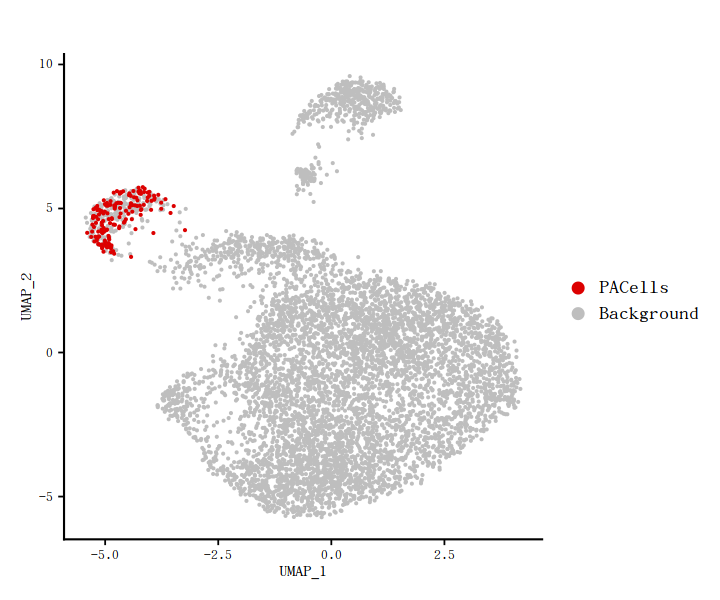

In [15]:
options(repr.plot.width=6, repr.plot.height=5)
DimPlot(object = AD_seurat, group.by = 'PACells_label', pt.size= .5,order=c("PACells","Background"))+
scale_colour_discrete(breaks=c("PACells","Background"), type= c("gray","#DC0000" ))+
labs(title = "") + 
theme(
       axis.line = element_line(color = 'black',size = 0.6),
    axis.title = element_text(size=10),
    axis.text= element_text(size=8),
    legend.title=element_text(size=10)
)

In [16]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.10

Matrix products: default
BLAS/LAPACK: /home/server/anaconda3/envs/JHTest2/lib/libopenblasp-r0.3.21.so

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=zh_CN.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=zh_CN.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] splines   stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.4.3                     BSgenome.Hsapiens.UCSC.hg38_1.4.4
 [3] BSgenome_1.64.0                   rtracklayer_1.56.1               
 [5] Biostrings_2.66.0                 XVecto